## Digit Recognizer with 2D Convolutional Neural Network
This notebook is for learning computer vision fundamentals with the famous MNIST data.

In [1]:
import numpy as np 
import pandas as pd 

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import tensorflow as tf
tf.__version__
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D, Dropout
from sklearn.metrics import classification_report, confusion_matrix

In [3]:
train=pd.read_csv('traindigit.csv')
test=pd.read_csv('testdigit.csv')
sample_submission=pd.read_csv('sample_submission.csv')

In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
[train.shape, test.shape]

[(42000, 785), (28000, 784)]

## Data Visualization

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

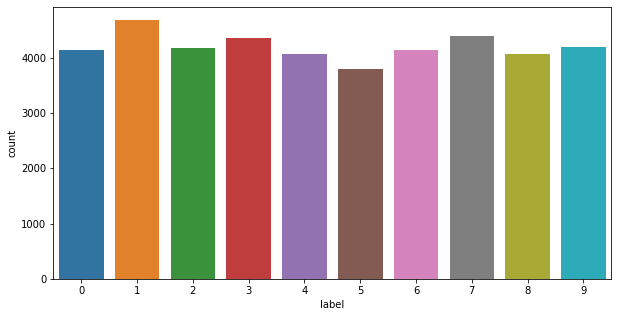

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(train.label)

In [8]:
##Seperation of Features and Labels as well as reshapig for CNN input
X_train=train.drop(columns=['label']).values
y_train=train.label.values
#Normalize the data
X_train=tf.keras.utils.normalize(X_train, axis=1)
X_test=tf.keras.utils.normalize(test, axis=1).values

In [9]:
print(X_train.shape, y_train.shape, X_test.shape)

(42000, 784) (42000,) (28000, 784)


In [10]:
X_test1 = X_test.reshape(X_test.shape[0],28,28,1)
X_train1 = X_train.reshape(X_train.shape[0],28,28,1)

## Building the Model

In [11]:
model=Sequential()
model.add(Conv2D(128, (3,3), input_shape=X_train1.shape[1:],strides=2))
model.add(Activation('relu'))

model.add(Conv2D(128, (3,3),strides=2))
model.add(Activation('relu'))


model.add(Conv2D(128, (3,3),strides=2))
model.add(Activation('relu'))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
                metrics=['accuracy']
              )
model.fit(X_train1, y_train, epochs=50, validation_split=0.2) 

Epoch 1/50
1050/1050 [==============================] - 26s 24ms/step - loss: 0.6926 - accuracy: 0.7722 - val_loss: 0.1181 - val_accuracy: 0.9626
Epoch 2/50
1050/1050 [==============================] - 28s 26ms/step - loss: 0.1487 - accuracy: 0.9546 - val_loss: 0.0766 - val_accuracy: 0.9771
Epoch 3/50
1050/1050 [==============================] - 30s 29ms/step - loss: 0.1019 - accuracy: 0.9682 - val_loss: 0.0614 - val_accuracy: 0.9789
Epoch 4/50
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0790 - accuracy: 0.9745 - val_loss: 0.0548 - val_accuracy: 0.9823
Epoch 5/50
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0675 - accuracy: 0.9777 - val_loss: 0.0513 - val_accuracy: 0.9846
Epoch 6/50
1050/1050 [==============================] - 29s 28ms/step - loss: 0.0569 - accuracy: 0.9820 - val_loss: 0.0469 - val_accuracy: 0.9846
Epoch 7/50
1050/1050 [==============================] - 29s 27ms/step - loss: 0.0545 - accuracy: 0.9828 - val_loss: 0.0519 -

## Data Analysis

In [12]:
y_pred_train=model.predict_classes(X_train1)
y_pred=model.predict_classes(X_test1)


C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


<AxesSubplot:>

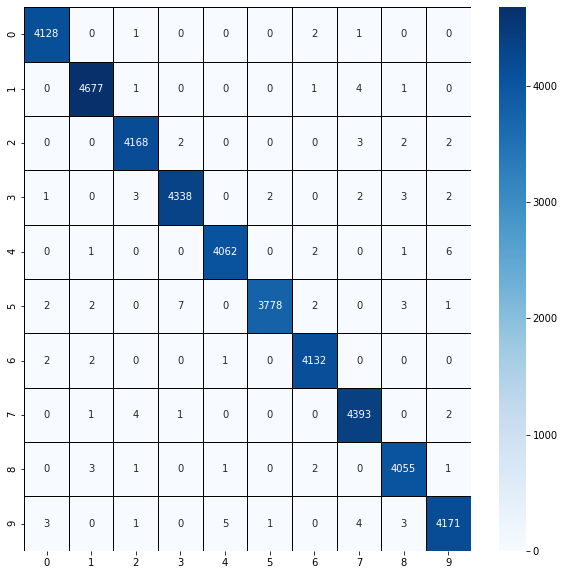

In [13]:
cm=confusion_matrix(y_train,y_pred_train)
cm=pd.DataFrame(cm, index=[i for i in range(10)], columns=[i for i in range(10)])
plt.figure(figsize=(10,10))
sns.heatmap(cm, cmap='Blues',linecolor='black',linewidths=1,annot=True,fmt='')

In [14]:
sample_submission.head()
submission=pd.DataFrame({'ImageId': sample_submission.ImageId,'Label':y_pred})
submission.to_csv('submission.csv',index=False)
check=pd.read_csv('submission.csv')
check.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


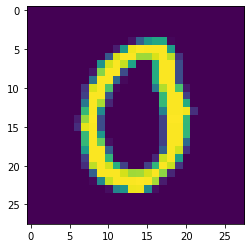

Prediction:  0


In [15]:
X_test_1=X_test.reshape(X_test.shape[0],28,28)
plt.imshow(X_test_1[100])
plt.show()
print('Prediction: ', y_pred[100])